In [185]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [186]:
df = pd.read_csv('full_devices.csv', index_col=0, encoding='latin-1')
df.head(5)

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
date,,,,,,,,,,,
2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [187]:
df.info()
n = df.shape[0]

<class 'pandas.core.frame.DataFrame'>
Index: 124494 entries, 2015-01-01 to 2015-11-02
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   device      124494 non-null  object
 1   failure     124494 non-null  int64 
 2   attribute1  124494 non-null  int64 
 3   attribute2  124494 non-null  int64 
 4   attribute3  124494 non-null  int64 
 5   attribute4  124494 non-null  int64 
 6   attribute5  124494 non-null  int64 
 7   attribute6  124494 non-null  int64 
 8   attribute7  124494 non-null  int64 
 9   attribute8  124494 non-null  int64 
 10  attribute9  124494 non-null  int64 
dtypes: int64(10), object(1)
memory usage: 11.4+ MB


In [188]:
df[df['failure']==0].describe()

,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
count,124388.0,1.243880e+05,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000,124388.000000
mean,0.0,1.223840e+08,156.118725,9.945598,1.696048,14.221613,260174.250587,0.266682,0.266682,12.442462
std,0.0,7.046036e+07,2145.521965,185.824103,22.164316,15.943381,99147.843106,6.558071,6.558071,191.455015
min,0.0,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.0,6.126677e+07,0.000000,0.000000,0.000000,8.000000,221451.000000,0.000000,0.000000,0.000000
50%,0.0,1.227861e+08,0.000000,0.000000,0.000000,10.000000,249794.000000,0.000000,0.000000,0.000000
75%,0.0,1.833093e+08,0.000000,0.000000,0.000000,12.000000,310266.250000,0.000000,0.000000,0.000000
max,0.0,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [189]:
len(df['device'].unique())

1169

In [190]:
df[df['device']=='S1F0RRB1']

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9
date,,,,,,,,,,,
2015-01-01,S1F0RRB1,0,5230888,2288,0,37,8,39267,24,24,1
2015-01-02,S1F0RRB1,0,13307628,64776,0,49,8,39267,56,56,1
2015-01-03,S1F0RRB1,0,26258330,64776,0,135,8,39267,56,56,1
2015-01-04,S1F0RRB1,0,37985862,64776,0,763,8,39267,56,56,1
2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1


In [191]:
for dev in df['device'].unique():
    df.loc[df['device']==dev, 'total_days'] = list(range(len(df[df['device']==dev])))

In [192]:
df['day_week'] = pd.to_datetime(df.index)
df['day_week'] = df['day_week'].dt.day_name()

In [193]:
df[df['device']=='S1F0RRB1']

,device,failure,attribute1,attribute2,attribute3,attribute4,attribute5,attribute6,attribute7,attribute8,attribute9,total_days,day_week
date,,,,,,,,,,,,,
2015-01-01,S1F0RRB1,0,5230888,2288,0,37,8,39267,24,24,1,0.0,Thursday
2015-01-02,S1F0RRB1,0,13307628,64776,0,49,8,39267,56,56,1,1.0,Friday
2015-01-03,S1F0RRB1,0,26258330,64776,0,135,8,39267,56,56,1,2.0,Saturday
2015-01-04,S1F0RRB1,0,37985862,64776,0,763,8,39267,56,56,1,3.0,Sunday
2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,56,1,4.0,Monday


In [194]:
def hist_analy(df,b):
    column_names = list(df)
    for feature in column_names[2:]:
        # Creating an empty chart
        fig, ((ax1, ax2)) = plt.subplots(1, 2,  figsize=(15, 4))
    
        # Extracting the feature values
        x = df[feature][df['failure']==0].values
        y = df[feature][df['failure']==1].values
        
        # Histogram
        ax1.hist(x, bins=b,weights = np.ones_like(x)/len(x))
        ax1.set_title( 'Histogram for {} with no failure'.format(feature)  )
    
        # Histogram
        ax2.hist(y, bins=b,weights = np.ones_like(y)/len(y))
        ax2.set_title( 'Histogram for {} with failure'.format(feature) )
    
        # Display
        plt.show()

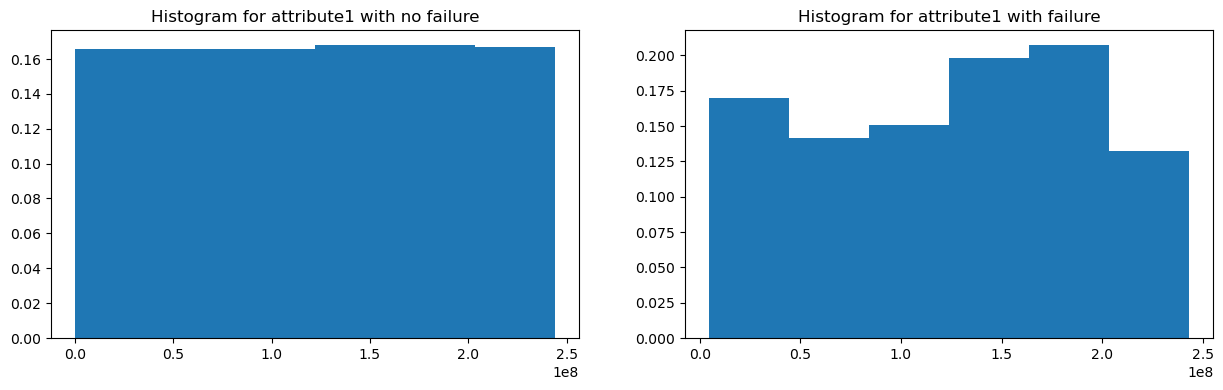

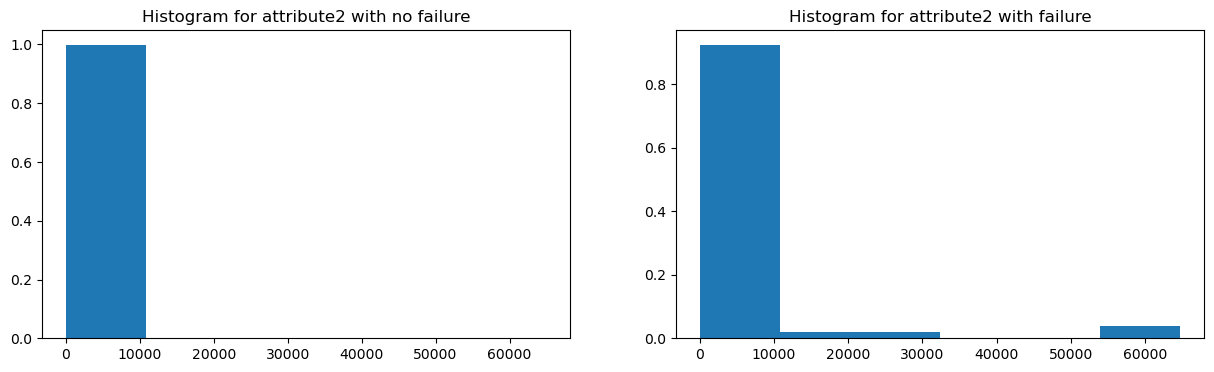

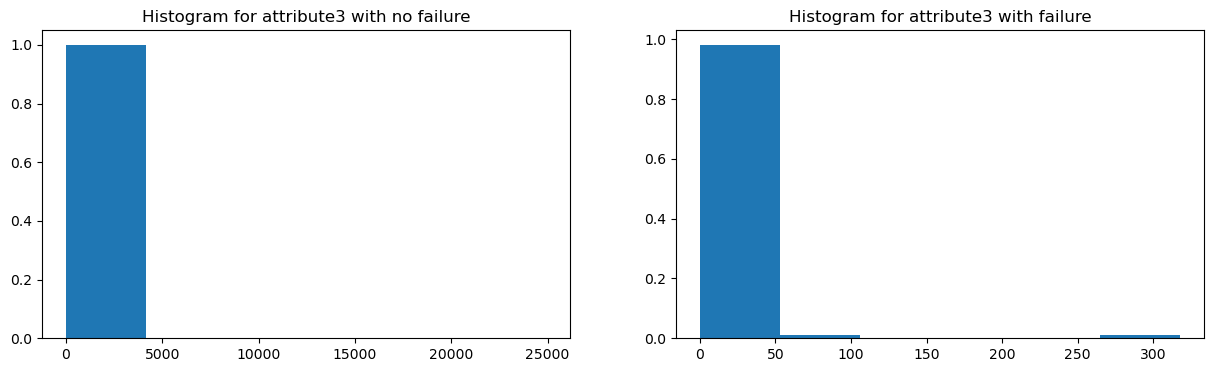

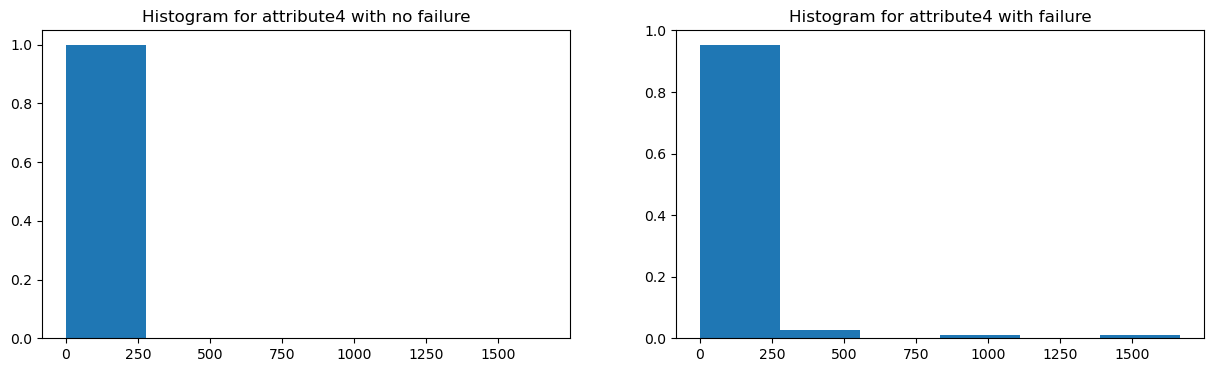

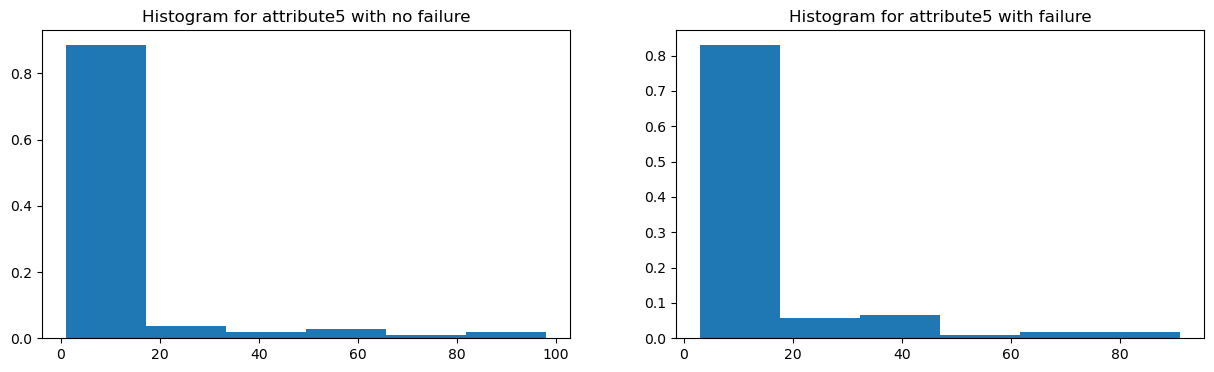

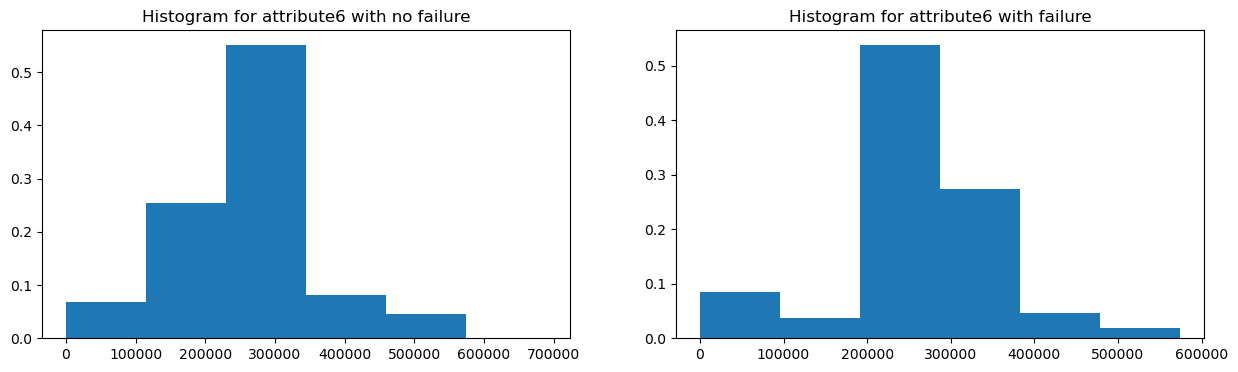

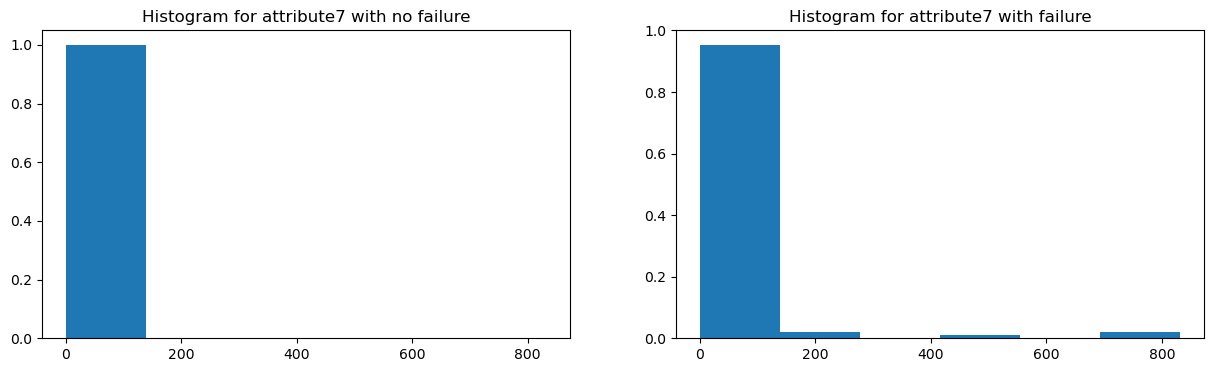

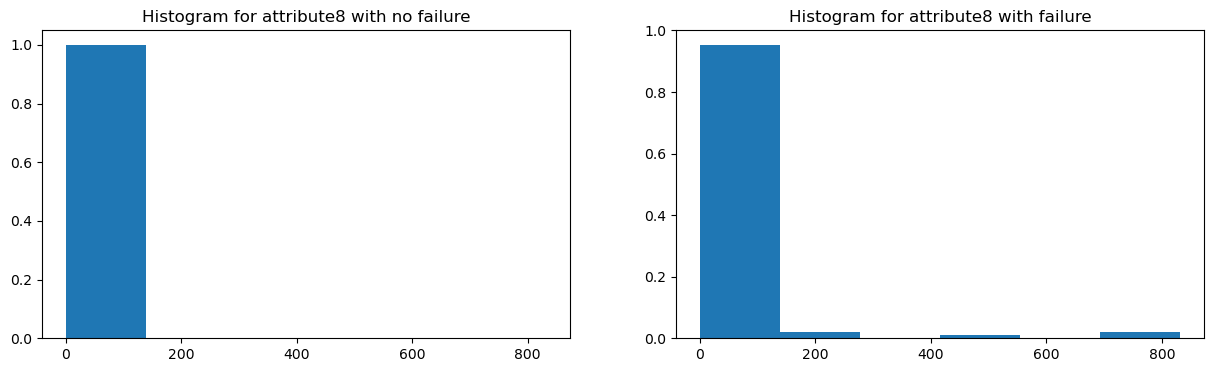

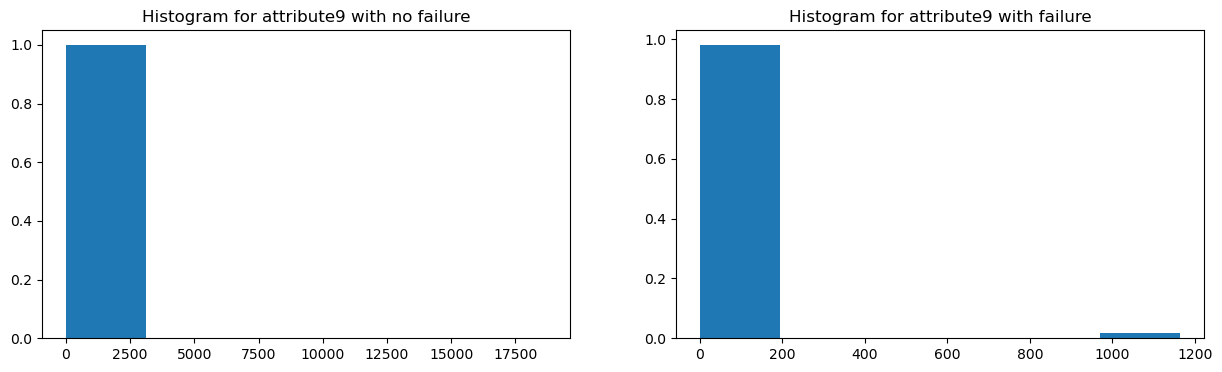

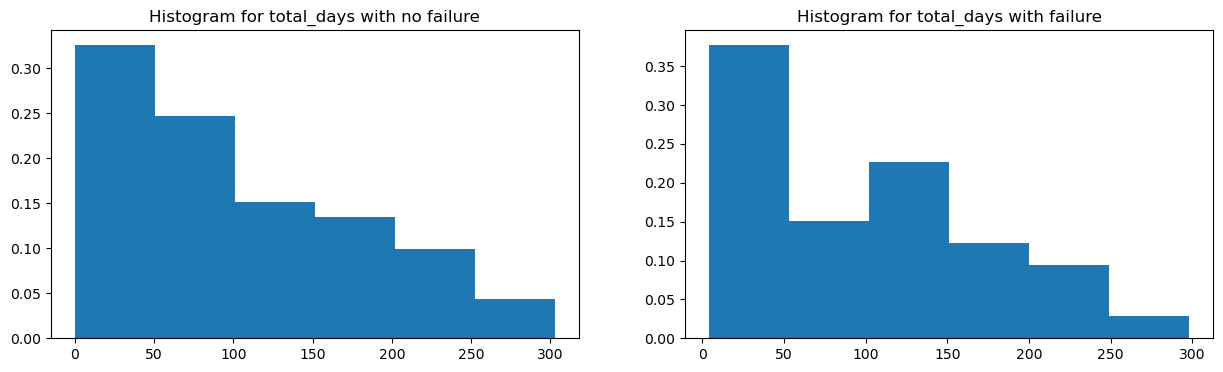

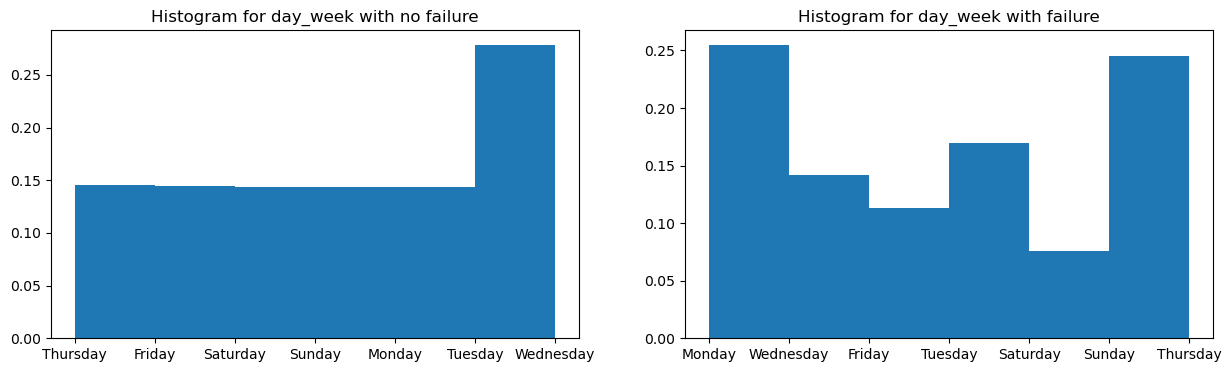

In [195]:
hist_analy(df,6)

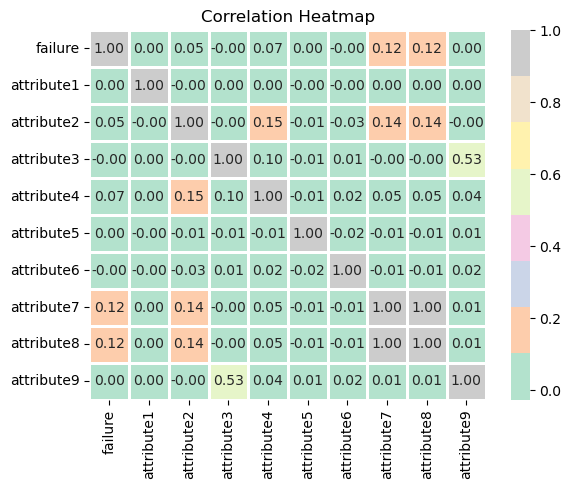

In [196]:
df_numeric = df.iloc[:,1:11]
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f', cmap='Pastel2', linewidths=2)

plt.title('Correlation Heatmap')
plt.show()

In [197]:
df = df.drop('attribute8', axis=1)

In [198]:
df.groupby(['day_week'])['failure'].sum()*100/df['failure'].sum()
#df.head(2)

day_week
Friday       11.320755
Monday       25.471698
Saturday      7.547170
Sunday        3.773585
Thursday     20.754717
Tuesday      16.981132
Wednesday    14.150943
Name: failure, dtype: float64

In [199]:
df.groupby(['day_week'])['failure'].value_counts(normalize=True)

day_week   failure
Friday     0          0.999335
           1          0.000665
Monday     0          0.998490
           1          0.001510
Saturday   0          0.999553
           1          0.000447
Sunday     0          0.999776
           1          0.000224
Thursday   0          0.998787
           1          0.001213
Tuesday    0          0.998973
           1          0.001027
Wednesday  0          0.999125
           1          0.000875
Name: proportion, dtype: float64

In [201]:
from sklearn import set_config
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

from sksurv.datasets import load_gbsg2
from sksurv.ensemble import RandomSurvivalForest
from sksurv.preprocessing import OneHotEncoder

In [202]:
day_str = df.loc[:,'day_week'].astype(object).values[:, np.newaxis]
day_num = OrdinalEncoder(categories=[list(df['day_week'].unique())]).fit_transform(day_str)
X = df.drop(['day_week','device', 'failure'], axis=1)
X = OneHotEncoder().fit_transform(X)
X.loc[:, 'day_week'] = day_num
X = X.reset_index(drop=True)

In [203]:
y = df.loc[:,['failure','total_days']]
y['failure'] = (y['failure']*-1+1).astype(bool)
y = y.reset_index(drop=True)
y = y.to_numpy()

aux = [(e1,e2) for e1,e2 in y]
y = np.array(aux, dtype=[('Status', '?'), ('Survival_in_days', '<f8')])

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [206]:
rsf = RandomSurvivalForest(n_estimators=100,n_jobs=-1, min_samples_split=10, min_samples_leaf=10)
rsf.fit(X_train, y_train)

RandomSurvivalForest(min_samples_leaf=10, min_samples_split=10, n_jobs=-1)

In [208]:
c_index = rsf.score(X_test, y_test)
f"{c_index:.5f}"
# Concordance index (0.5, 1)

'0.69404'

In [209]:
rsf.predict(X_test)

array([505.52165688, 486.75098821, 553.34588837, ..., 302.4363174 ,
       420.25558439, 648.81842737])

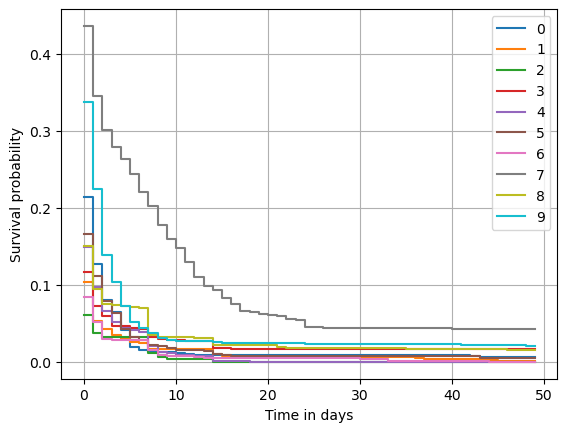

In [210]:
m = 10
T = 50
X_test_sample = X.head(m)
surv = rsf.predict_survival_function(X_test_sample, return_array=True)
surv = surv[:,0:T]
rsf.unique_times_ = rsf.unique_times_[0:T]

for i, s in enumerate(surv):
    plt.step(rsf.unique_times_, s, where="post", label=str(i))
plt.ylabel("Survival probability")
plt.xlabel("Time in days")
plt.legend()
plt.grid(True)